In [1]:
import numpy as np

import pandas as pd

import xarray as xr

import glob

import matplotlib as mpl

import matplotlib.pyplot as plt

import math as mt

from math import e

import datetime

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from random import seed
from random import randint

from scipy.signal import hilbert
import statistics
from scipy.stats import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from joblib import dump, load
import cartopy.crs as ccrs
import matplotlib.ticker as ticker
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# Read IPSL files

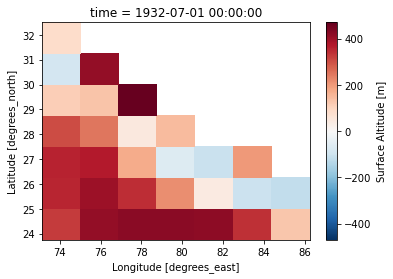

In [2]:
#Read Orography
I_OroData = xr.open_dataset('../../../Data/CMIP6/UKESM1-0-LL/NDJF/orog_fx_UKESM1-0-LL_historical_r1i1p1f2_gn_185001-201412.nc')
Ioro=I_OroData.orog.sel(lat=slice(24,32),lon=slice(74,86))
#Ioro.plot()
#Create Mask
Ioro.values[Ioro.values>500.1]=np.NaN
Imask=Ioro.values/Ioro.values
Ioro.plot()

# GFDL T2m and T2m hilbert

In [3]:
#Read Data
I_t2mData= xr.open_dataset('../../../Data/CMIP6/UKESM1-0-LL/NDJF/tas_NDJFday_UKESM1-0-LL_historical_r1i1p1f2_gn_18500101-20141230.nc')
#time1=I_t2mData.indexes['time'].to_datetimeindex()
#I_t2mData=I_t2mData.assign_coords(time=("time", time1))
It2mD = I_t2mData.sel(lat=slice(24,32),lon=slice(74,86))

In [4]:

#Mask data
It2mD.tas.values=It2mD.tas.values*Imask
# area avg
It2mTS=It2mD.mean(dim=['lat','lon'], skipna=True).tas
#Hilbert transform
It2m_hb = np.imag(hilbert(It2mTS.values,axis=0))
It2m_hb_ds = xr.Dataset({'It2m_hb': (('time'), It2m_hb)}, coords={'time': It2mTS.time})
#ISelect only Dec Jan months
It2m=It2mTS[((It2mTS.time.dt.month>11) | (It2mTS.time.dt.month<2))]
It2mhb=It2m_hb_ds.It2m_hb[((It2m_hb_ds.time.dt.month>11) | (It2m_hb_ds.time.dt.month<2))] 


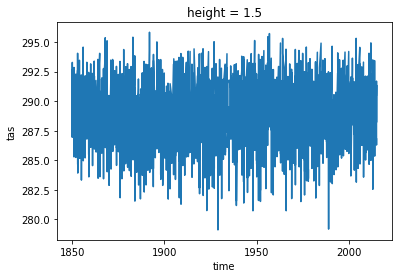

In [5]:
It2m.plot()

# IPSL wind speed and wind speed hilbert

In [6]:
# Read data
Iu10Data = xr.open_dataset('../../../Data/CMIP6/UKESM1-0-LL/NDJF/uas_NDJFday_UKESM1-0-LL_historical_r1i1p1f2_gn_18500101-20141230.nc')
Iv10Data = xr.open_dataset('../../../Data/CMIP6/UKESM1-0-LL/NDJF/vas_NDJFday_UKESM1-0-LL_historical_r1i1p1f2_gn_18500101-20141230.nc')
#Iu10Data=Iu10Data.assign_coords(time=("time", time1))
#Iv10Data=Iv10Data.assign_coords(time=("time", time1))

Iu10D = Iu10Data.sel(lat=slice(24,32),lon=slice(74,86))
Iv10D = Iv10Data.sel(lat=slice(24,32),lon=slice(74,86))
# Calculate wind speed
Iws = ((Iv10D.vas.values**2)+(Iu10D.uas.values**2))**0.5
Iws_ds = xr.Dataset({'Iws': (('time','lat','lon'), Iws)}, coords={'time': Iv10D.time,'lat': Iv10D.lat,'lon': Iv10D.lon})
#Mask
Iws_ds.Iws.values=Iws_ds.Iws.values*Imask
# area avg
IwsTS=Iws_ds.mean(dim=['lat','lon'], skipna=True).Iws
# hilbert
Iws_hb = np.imag(hilbert(IwsTS.values,axis=0))
Iws_hb_ds = xr.Dataset({'Iws_hb': (('time'), Iws_hb)}, coords={'time': IwsTS.time})
#Select Dec and Jan
Iws=IwsTS[((IwsTS.time.dt.month>11) | (IwsTS.time.dt.month<2))] 
Iwshb=Iws_hb_ds.Iws_hb[((Iws_hb_ds.time.dt.month>11) | (Iws_hb_ds.time.dt.month<2))]

# IPSL rh and rh hilbert

In [7]:
Iu10D.lon

<xarray.DataArray 'lon' (lon: 7)>
array([74.0625, 75.9375, 77.8125, 79.6875, 81.5625, 83.4375, 85.3125])
Coordinates:
  * lon      (lon) float64 74.06 75.94 77.81 79.69 81.56 83.44 85.31
    height   float64 ...
Attributes:
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east
    axis:           X
    bounds:         lon_bnds

In [8]:
#Read Data
I_rhData= xr.open_mfdataset('../../../Data/CMIP6/UKESM1-0-LL/NDJF/hurs_NDJFday_UKESM1-0-LL_historical_r1i1p1f2_gn_18500101-20141230.nc')
#I_rhData=I_rhData.assign_coords(time=("time", time1))

IrhD = I_rhData.sel(lat=slice(24,32),lon=slice(74,86))
IrhD.hurs.values=IrhD.hurs.values/100.0
#Mask data
IrhD.hurs.values=IrhD.hurs.values*Imask
# area avg
IrhTS=IrhD.mean(dim=['lat','lon'], skipna=True).hurs
#Hilbert transform
Irh_hb = np.imag(hilbert(IrhTS.values,axis=0))
Irh_hb_ds = xr.Dataset({'Irh_hb': (('time'), Irh_hb)}, coords={'time': IrhTS.time})
#ISelect only Dec Jan months
Irh=IrhTS[((IrhTS.time.dt.month>11) | (IrhTS.time.dt.month<2))]
Irhhb=Irh_hb_ds.Irh_hb[((Irh_hb_ds.time.dt.month>11) | (Irh_hb_ds.time.dt.month<2))] 


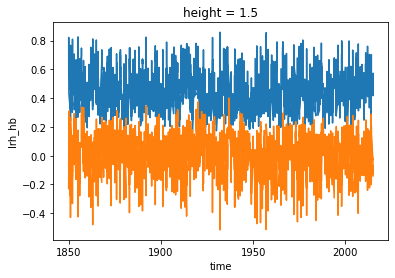

In [9]:
Irh.plot()
Irhhb.plot()

#  IPSL inv and inv hilbert

In [10]:
# Read 850 hPa t
I_tLevData= xr.open_dataset('../../../Data/CMIP6/UKESM1-0-LL/NDJF/ta_NDJFday_UKESM1-0-LL_historical_r1i1p1f2_gn_18500101-20141230.nc')
#I_tLevData=I_tLevData.assign_coords(time=("time", time1))

It850D=I_tLevData.sel(lat=slice(24,32),lon=slice(74,86),plev=85000)
It850D.ta.values=It850D.ta.values*Imask
# Calculate inv
Iinv = It2mD.tas.values-It850D.ta.values
Iinv_ds = xr.Dataset({'Iinv': (('time','lat','lon'), Iinv)}, coords={'time': Iv10D.time,'lat': Iv10D.lat,'lon': Iv10D.lon})
#Iinv_ds.Iinv
#Mask
Iinv_ds.Iinv.values=Iinv_ds.Iinv.values*Imask
# area avg
IinvTS=Iinv_ds.mean(dim=['lat','lon'], skipna=True).Iinv
# hilbert
Iinv_hb = np.imag(hilbert(IinvTS.values,axis=0))
Iinv_hb_ds = xr.Dataset({'Iinv_hb': (('time'), Iinv_hb)}, coords={'time': IinvTS.time})
#Select Dec and Jan
Iinv=IinvTS[((IinvTS.time.dt.month>11) | (IinvTS.time.dt.month<2))] 
Iinvhb=Iinv_hb_ds.Iinv_hb[((Iinv_hb_ds.time.dt.month>11) | (Iinv_hb_ds.time.dt.month<2))]



In [11]:
I_tLevData

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 144, lon: 192, plev: 8, time: 19800)
Coordinates:
  * time       (time) object 1850-01-01 12:00:00 ... 2014-12-30 12:00:00
  * lon        (lon) float64 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
  * lat        (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * plev       (plev) float64 1e+05 8.5e+04 7e+04 5e+04 ... 1e+04 5e+03 1e+03
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lon_bnds   (lon, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    ta         (time, plev, lat, lon) float32 ...
Attributes:
    CDI:                    Climate Data Interface version 1.9.5 (http://mpim...
    history:                Mon Feb 01 13:18:40 2021: cdo selmon,1,2,11,12 ta...
    source:                 UKESM1.0-LL (2018): \naerosol: UKCA-GLOMAP-mode\n...
    institution:            Met Office Hadley Centre, Fitzroy Road, Exeter, D...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  144000.0
    creation_date:          2019-06-24T15:17:06Z
    cv_version:             6.2.20.1
    data_specs_version:     01.00.29
    experiment:             all-forcing simulation of the recent past
    experiment_id:          historical
    external_variables:     areacella
    forcing_index:          2
    frequency:              day
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.MOHC.UKESM1-...
    grid:                   Native N96 grid; 192 x 144 longitude/latitude
    grid_label:             gn
    initialization_index:   1
    institution_id:         MOHC
    mip_era:                CMIP6
    mo_runid:               u-bc179
    nominal_resolution:     250 km
    parent_activity_id:     CMIP
    parent_experiment_id:   piControl
    parent_mip_era:         CMIP6
    parent_source_id:       UKESM1-0-LL
    parent_time_units:      days since 1850-01-01-00-00-00
    parent_variant_label:   r1i1p1f2
    physics_index:          1
    product:                model-output
    realization_index:      1
    realm:                  atmos
    source_id:              UKESM1-0-LL
    source_type:            AOGCM AER BGC CHEM
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               day
    table_info:             Creation Date:(13 December 2018) MD5:2b12b5db6db1...
    title:                  UKESM1-0-LL output prepared for CMIP6
    variable_id:            ta
    variant_label:          r1i1p1f2
    license:                CMIP6 model data produced by the Met Office Hadle...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/78f14ccb-7d9e-4c99-b06c-c10be8192a94
    CDO:                    Climate Data Operators version 1.9.5 (http://mpim...


# IPSL w700 and w700 hilbert

In [12]:
# Read Data
I_w700Data= xr.open_dataset('../../../Data/CMIP6/UKESM1-0-LL/NDJF/wap_NDJFday_UKESM1-0-LL_historical_r1i1p1f2_gn_18500101-20141230.nc')
#I_w700Data=I_w700Data.assign_coords(time=("time", time1))

Iw700D = I_w700Data.sel(lat=slice(24,32),lon=slice(74,86),plev=(70000))
#Mask data
Iw700D.wap.values=Iw700D.wap.values*Imask
# area avg
Iw700TS=Iw700D.mean(dim=['lat','lon'], skipna=True).wap
#Hilbert transform
Iw700_hb = np.imag(hilbert(Iw700TS.values,axis=0))
Iw700_hb_ds = xr.Dataset({'Iw700_hb': (('time'), Iw700_hb)}, coords={'time': Iw700TS.time})
#ISelect only Dec Jan months
Iw700=Iw700TS[((Iw700TS.time.dt.month>11) | (Iw700TS.time.dt.month<2))]
Iw700hb=Iw700_hb_ds.Iw700_hb[((Iw700_hb_ds.time.dt.month>11) | (Iw700_hb_ds.time.dt.month<2))] 

# GFDL ushear and ushear hilbert

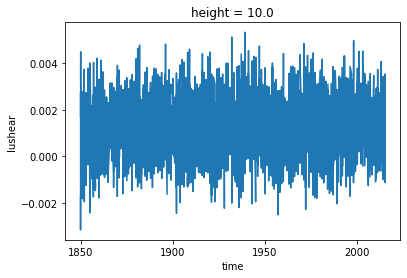

In [13]:
# Read 850 hPa u 
I_uLevData= xr.open_dataset('../../../Data/CMIP6/UKESM1-0-LL/NDJF/ua_NDJFday_UKESM1-0-LL_historical_r1i1p1f2_gn_18500101-20141230.nc')
#I_uLevData=I_uLevData.assign_coords(time=("time", time1))

Iu850D=I_uLevData.sel(lat=slice(24,32),lon=slice(74,86),plev=85000)
# Read 850 hPa  z 
I_zLevData= xr.open_dataset('../../../Data/CMIP6/UKESM1-0-LL/NDJF/zg_NDJFday_UKESM1-0-LL_historical_r1i1p1f2_gn_18500101-20141230.nc')
#I_zLevData=I_zLevData.assign_coords(time=("time", time1))

Iz850D=I_zLevData.sel(lat=slice(24,32),lon=slice(74,86),plev=85000)
# Calculate ushear
Iushear = (Iu850D.ua.values-Iu10D.uas.values)/(Iz850D.zg.values) 
Iushear_ds = xr.Dataset({'Iushear': (('time','lat','lon'), Iushear)}, coords={'time': Iv10D.time,'lat': Iv10D.lat,'lon': Iv10D.lon})
#Iushear_ds.Iushear[0,:,:].plot()
#Mask
Iushear_ds.Iushear.values=Iushear_ds.Iushear.values*Imask
# area avg
IushearTS=Iushear_ds.mean(dim=['lat','lon'], skipna=True).Iushear
# hilbert
Iushear_hb = np.imag(hilbert(IushearTS.values,axis=0))
Iushear_hb_ds = xr.Dataset({'Iushear_hb': (('time'), Iushear_hb)}, coords={'time': IushearTS.time})
#Select Dec and Jan
Iushear=IushearTS[((IushearTS.time.dt.month>11) | (IushearTS.time.dt.month<2))] 
Iushearhb=Iushear_hb_ds.Iushear_hb[((Iushear_hb_ds.time.dt.month>11) | (Iushear_hb_ds.time.dt.month<2))]
Iushear.plot()

In [15]:
#IX       = pd.DataFrame([It2m.values,Iws.values,Irh.values,Iinv.values,Iw700.values,Iushear.values*100.0,
#                       It2mhb.values,Iwshb.values,Irhhb.values,Iinvhb.values,Iw700hb.values,Iushearhb.values]).T[:]
IX       = pd.DataFrame([It2m.values,Iws.values,Irh.values,Iinv.values,Iw700.values,Iushear.values*100.0]).T[:]

time1=It2m.indexes['time'].to_datetimeindex()

IX.index = pd.to_datetime(time1.values)
IX

<ipython-input-15-624212815d6c>:5: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, '360_day', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  time1=It2m.indexes['time'].to_datetimeindex()


,0,1,2,3,4,5
1850-01-01 12:00:00,289.082306,4.744821,0.575461,6.127677,-0.203794,-0.178146
1850-01-02 12:00:00,289.668915,5.407553,0.638844,6.487126,-0.314364,-0.276363
1850-01-03 12:00:00,288.553589,4.511251,0.822737,6.688794,-0.228092,-0.316989
1850-01-04 12:00:00,288.710358,2.229649,0.806000,6.100220,0.066136,0.021951
1850-01-05 12:00:00,288.855194,2.138550,0.749286,4.958056,0.094150,0.055480
...,...,...,...,...,...,...
2014-12-26 12:00:00,286.296417,2.697158,0.544557,1.614998,-0.046189,-0.083668
2014-12-27 12:00:00,286.625061,2.489702,0.573576,1.198039,-0.035666,-0.007132
2014-12-28 12:00:00,286.700043,2.567163,0.554302,2.228011,0.016967,0.057943
2014-12-29 12:00:00,286.535065,1.844172,0.531896,2.633293,-0.015505,0.054253


In [16]:
normI = StandardScaler().fit(IX)
    # transform training data
IX = normI.transform(IX)
IX

array([[ 0.20815231,  2.89448958,  1.00370862,  1.51137663, -1.79387284,
        -2.79925655],
       [ 0.45202161,  3.67583926,  1.52695032,  1.68694825, -2.70975116,
        -3.71053661],
       [-0.01164976,  2.61911449,  3.04503699,  1.78545257, -1.99514168,
        -4.08746732],
       ...,
       [-0.78221939,  0.32706819,  0.82903656, -0.39340488,  0.03473825,
        -0.60877894],
       [-0.85080525, -0.52532537,  0.64406684, -0.1954462 , -0.23424092,
        -0.64302031],
       [-0.73771343, -0.33040115,  0.46730995,  0.30636501, -0.29178434,
        -1.21546158]])

In [17]:
reg = load('regGB_Obs.joblib') 
reg

GradientBoostingRegressor(learning_rate=0.04, min_samples_leaf=20,
                          n_estimators=300, random_state=0)

In [18]:
regLin=load('regLR_Obs.joblib')
regLin

LinearRegression()

In [19]:
y_ds=load('y_ds_Obs.joblib')
y_ds

<xarray.Dataset>
Dimensions:  (time: 2170)
Coordinates:
    expver   float64 1.0
  * time     (time) datetime64[ns] 1980-01-01T10:30:00 ... 2014-12-31T10:30:00
Data variables:
    y        (time) float64 0.32 0.4 0.4 0.36 0.32 ... 0.68 0.8 0.76 0.72 0.76

In [20]:
y_pred_ds=load('y_pred_ds_Obs.joblib')
y_pred_ds

<xarray.Dataset>
Dimensions:  (time: 2170)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2014-12-31
Data variables:
    y_pred   (time) float64 0.2012 0.2858 0.3558 0.3774 ... 0.6405 0.6206 0.6037

In [21]:
y_predLin_ds=load('y_predLin_ds_Obs.joblib')
y_predLin_ds

<xarray.Dataset>
Dimensions:    (time: 2170)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2014-12-31
Data variables:
    y_predLin  (time) float64 0.2822 0.383 0.3899 ... 0.5674 0.5565 0.4545

In [22]:
Iy_pred=reg.predict(IX)
Iy_predLin=regLin.predict(IX)
Iy_df = pd.DataFrame(Iy_pred)
Iy_df.index = pd.to_datetime(time1.values)
Iy_dfLin = pd.DataFrame(Iy_predLin)
Iy_dfLin.index = pd.to_datetime(time1.values)

In [23]:
Iy_ds=xr.Dataset({'Iy_pred': (('time'), Iy_pred)}, coords={'time': time1})
Iy_ds

IyLin_ds=xr.Dataset({'Iy_predLin': (('time'), Iy_predLin)}, coords={'time': time1})
IyLin_ds

<xarray.Dataset>
Dimensions:     (time: 9900)
Coordinates:
  * time        (time) datetime64[ns] 1850-01-01T12:00:00 ... 2014-12-30T12:0...
Data variables:
    Iy_predLin  (time) float64 0.1003 0.06973 0.3392 ... 0.4102 0.4023 0.3315

(0.816141217070912, 0.0)

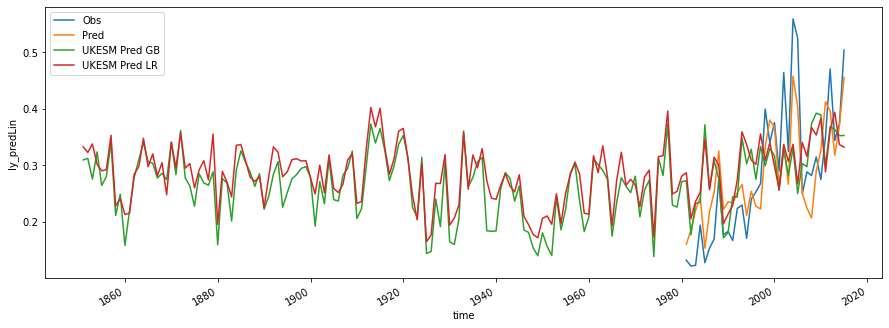

In [25]:
plt.figure(figsize=[15,5])
y_ds.resample(time='1Y').mean().y.dropna(dim='time').plot(label='Obs')
y_pred_ds.resample(time='1Y').mean().y_pred.dropna(dim='time').plot(label='Pred')


Iy_ds.resample(time='1Y').mean().Iy_pred.dropna(dim='time').plot(label='UKESM Pred GB')
IyLin_ds.resample(time='1Y').mean().Iy_predLin.dropna(dim='time').plot(label='UKESM Pred LR')

plt.legend()
np.corrcoef(y_ds.y.values, y_pred_ds.y_pred.values)
stats.pearsonr(y_ds.y.values, y_pred_ds.y_pred.values)
#y_ds.y.values.corr(y_pred_ds.y_pred.values)

(0.816141217070912, 0.0)

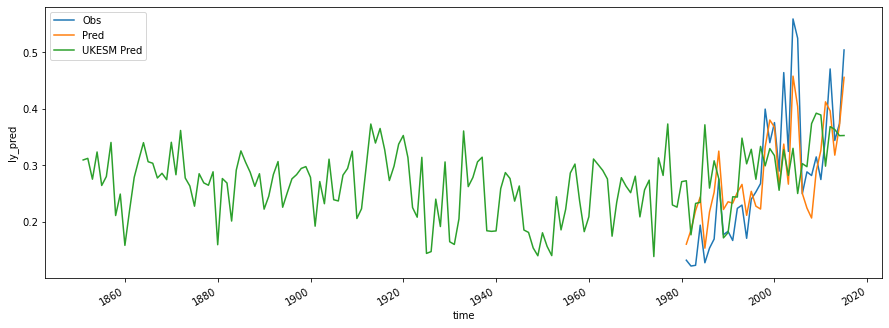

In [26]:
plt.figure(figsize=[15,5])
y_ds.resample(time='1Y').mean().y.dropna(dim='time').plot(label='Obs')
y_pred_ds.resample(time='1Y').mean().y_pred.dropna(dim='time').plot(label='Pred')
Iy_ds.resample(time='1Y').mean().Iy_pred.dropna(dim='time').plot(label='UKESM Pred')


plt.legend()
np.corrcoef(y_ds.y.values, y_pred_ds.y_pred.values)
stats.pearsonr(y_ds.y.values, y_pred_ds.y_pred.values)

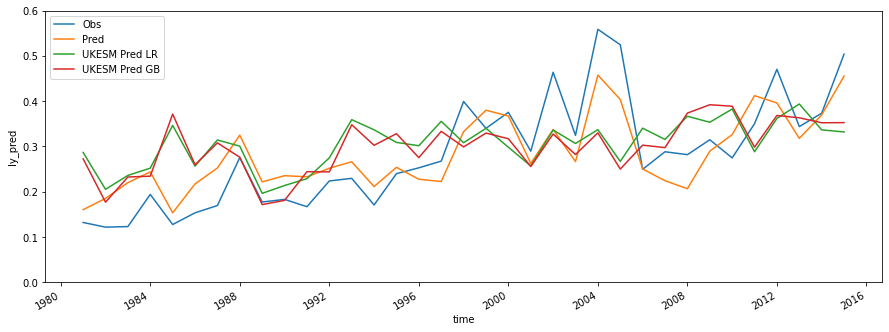

In [27]:
plt.figure(figsize=[15,5])
y_ds.resample(time='1Y').mean().y.dropna(dim='time').plot(label='Obs')
y_pred_ds.resample(time='1Y').mean().y_pred.dropna(dim='time').plot(label='Pred')
IyLin_ds.resample(time='1Y').mean().Iy_predLin.dropna(dim='time')[130:].plot(label='UKESM Pred LR')
Iy_ds.resample(time='1Y').mean().Iy_pred.dropna(dim='time')[130:].plot(label='UKESM Pred GB')
plt.ylim(0, 0.6)
plt.legend()
plt.savefig('../UKESM_yearly.jpeg',dpi=300)

In [32]:
Widespread_Iy_pred=Iy_ds.Iy_pred.where(Iy_ds.Iy_pred > 0.44, drop=True)
# Total number of widespread fog days
print(Widespread_Iy_pred.sel(time=slice('1980-1-1','2014-12-31')).count())
# mean annual frequency
print(Iy_ds.Iy_pred.sel(time=slice('1980-1-1','2014-12-31')).where(Iy_ds.Iy_pred > 0.44).resample(time='1Y').count().mean())
# interannual std 
print(Iy_ds.Iy_pred.sel(time=slice('1980-1-1','2014-12-31')).where(Iy_ds.Iy_pred > 0.44).resample(time='1Y').count().std())
#Widespread_y_pred.resample(time='1Y').count()

<xarray.DataArray 'Iy_pred' ()>
array(345)
<xarray.DataArray 'Iy_pred' ()>
array(9.85714286)
<xarray.DataArray 'Iy_pred' ()>
array(6.68534798)


In [33]:
Widespread_Iy_predLin=IyLin_ds.Iy_predLin.where(IyLin_ds.Iy_predLin > 0.44, drop=True)
# Total number of widespread fog days
print(Widespread_Iy_predLin.sel(time=slice('1980-1-1','2014-12-31')).count())
# mean annual frequency
print(IyLin_ds.Iy_predLin.sel(time=slice('1980-1-1','2014-12-31')).where(IyLin_ds.Iy_predLin > 0.44).resample(time='1Y').count().mean())
# interannual std 
print(IyLin_ds.Iy_predLin.sel(time=slice('1980-1-1','2014-12-31')).where(IyLin_ds.Iy_predLin > 0.44).resample(time='1Y').count().std())
#Widespread_y_pred.resample(time='1Y').count()

<xarray.DataArray 'Iy_predLin' ()>
array(306)
<xarray.DataArray 'Iy_predLin' ()>
array(8.74285714)
<xarray.DataArray 'Iy_predLin' ()>
array(6.41134199)


In [28]:
print(np.corrcoef(y_ds.resample(time='1Y').mean().y,Iy_ds.resample(time='1Y').mean().Iy_pred[130:]))
print(np.corrcoef(y_ds.resample(time='1Y').mean().y,IyLin_ds.resample(time='1Y').mean().Iy_predLin[130:]))

[[1.         0.43251641]
 [0.43251641 1.        ]]
[[1.         0.41945525]
 [0.41945525 1.        ]]


obsTs=y_ds.resample(time='1M').mean().y.dropna(dim='time')
time1=obsTs["time"].dt.strftime("%m-%Y")
obsTs1=obsTs.assign_coords(time=("time", time1))


GBTs=Iy_ds.resample(time='1M').mean().Iy_pred.dropna(dim='time')[259:]
timeGB=GBTs["time"].dt.strftime("%m-%Y")
GBTs1=GBTs.assign_coords(time=("time", timeGB))
GBTs1

LinTs=IyLin_ds.resample(time='1M').mean().Iy_predLin.dropna(dim='time')[259:]
timeLin=LinTs["time"].dt.strftime("%m-%Y")
LinTs1=LinTs.assign_coords(time=("time", timeGB))
LinTs1



plt.figure(figsize=[15,5])
plt.plot(obsTs1.time.values,obsTs1.values,label='Obs')
plt.plot(GBTs1.time.values,GBTs1.values,label='GB_GFDL')
plt.plot(LinTs1.time.values,LinTs1.values,label='LR_GFDL')
plt.xticks(rotation=90)
plt.legend() 
#y_ds1.y.plot()

obsTs=y_ds.resample(time='1Y').mean().y.dropna(dim='time')
time1=obsTs["time"].dt.strftime("%Y")
obsTs1=obsTs.assign_coords(time=("time", time1))


GBTs=Iy_ds.resample(time='1Y').mean().Iy_pred.dropna(dim='time')[259:]
timeGB=GBTs["time"].dt.strftime("%Y")
GBTs1=GBTs.assign_coords(time=("time", timeGB))
GBTs1

LinTs=IyLin_ds.resample(time='1Y').mean().Iy_predLin.dropna(dim='time')[259:]
timeLin=LinTs["time"].dt.strftime("%Y")
LinTs1=LinTs.assign_coords(time=("time", timeGB))
LinTs1



plt.figure(figsize=[15,5])
plt.plot(obsTs1.time.values,obsTs1.values,label='Obs')
plt.plot(GBTs1.time.values,GBTs1.values,label='GB_GFDL')
plt.plot(LinTs1.time.values,LinTs1.values,label='LR_GFDL')
plt.xticks(rotation=90)
plt.legend() 
#y_ds1.y.plot()

In [29]:
# Read z500 data
Iz500Data_Orig = I_zLevData.sel(plev=50000)
#Iz500Data


# Calculate anomalies

In [38]:
climatology = Iz500Data_Orig.groupby("time.dayofyear").mean("time")
Iz500Data = Iz500Data_Orig.groupby("time.dayofyear") - climatology
#climatology


In [ ]:
timecd=Iz500Data.indexes['time'].to_datetimeindex()
Iz500Data=Iz500Data.assign_coords(time=("time", timecd))
Iz500Data.time

In [34]:
Iy_ds.Iy_pred
Widespread_Iy1=Iy_ds.Iy_pred.where(Iy_ds.Iy_pred > 0.44, drop=True)
Widespread_Iy=Widespread_Iy1.sel(time=slice('1980-1-1','2014-12-31'))
totalCnt=Widespread_Iy.time.sizes
totalCnt

Frozen({'time': 345})

In [35]:
time11=Widespread_Iy.time
time11

<xarray.DataArray 'time' (time: 345)>
array(['1980-01-05T12:00:00.000000000', '1980-01-07T12:00:00.000000000',
       '1980-01-09T12:00:00.000000000', ..., '2014-12-27T12:00:00.000000000',
       '2014-12-28T12:00:00.000000000', '2014-12-29T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1980-01-05T12:00:00 ... 2014-12-29T12:00:00

In [36]:
zwide=Iz500Data.sel(time=Widespread_Iy.time,method="nearest")
zwide

TypeError: cannot compare cftime.Datetime360Day(1850, 1, 1, 12, 0, 0, 0) and Timestamp('2014-12-29 12:00:00') (different calendars)

In [ ]:
zwidePos=zwide.zg.where(zwide.zg.sel(lat=slice(20,40),lon=slice(60,85)).mean(dim=['lat','lon']) > 0.0, drop=True)
PosCnt=zwidePos.time.sizes

In [ ]:
zwideNeg=zwide.zg.where(zwide.zg.sel(lat=slice(20,40),lon=slice(60,85)).mean(dim=['lat','lon']) < 0.0, drop=True)
NegCnt=zwideNeg.time.sizes

In [ ]:
zwideAll=zwide.zg.sel(lat=slice(0,70),lon=slice(20,150)).mean(dim='time')
#zwideAll

In [ ]:
zNeg=zwideNeg.sel(lat=slice(0,70),lon=slice(20,150)).mean(dim='time')
#zNeg

zPos=zwidePos.sel(lat=slice(0,70),lon=slice(20,150)).mean(dim='time')
#zPos

In [ ]:
zwideNeg

In [ ]:
zwidePos

In [ ]:
def map_plot(ax1):
    ax1.coastlines()
    ax1.set_xticks([20,40 , 60,80, 100,120, 140], crs=ccrs.PlateCarree())
    ax1.set_yticks([ 10, 20, 30, 40, 50, 60,70], crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax1.xaxis.set_major_formatter(lon_formatter)
    ax1.yaxis.set_major_formatter(lat_formatter)

In [ ]:
# for contour labels
delta = 5.0
x = np.arange(-60, 60, delta)
y = np.arange(-60, 60, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2
# Define a class that forces representation of float to look a certain way
# This remove trailing zero so '1.0' becomes '1'


class nf(float):
    def __repr__(self):
        s = f'{self:.1f}'
        return f'{self:.0f}' if s[-1] == '0' else s


fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121,projection=ccrs.PlateCarree())

m1=ax1.pcolor(zNeg.lon.values,zNeg.lat.values,zNeg,transform=ccrs.PlateCarree(),cmap='jet',vmax=60,vmin=-60)
#xr.plot.contour(zwideNeg.sel(latitude=slice(70,0),longitude=slice(20,150)).mean(dim='time'),figsize=[10,5],levels=np.linspace(-60,60,21 ),colors ='black',   transform=ccrs.PlateCarree())
map_plot(ax1)
ax1.coastlines()
ax1.set_title('IPSL Neg Widespread Fog Days')
fig.colorbar(m1,orientation='horizontal')

ax2 = fig.add_subplot(122,projection=ccrs.PlateCarree())

m2=ax2.pcolor(zPos.lon.values,zPos.lat.values,zPos,transform=ccrs.PlateCarree(),cmap='jet',vmax=60,vmin=-60)
#xr.plot.contour(zwideNeg.sel(latitude=slice(70,0),longitude=slice(20,150)).mean(dim='time'),figsize=[10,5],levels=np.linspace(-60,60,21 ),colors ='black',   transform=ccrs.PlateCarree())
map_plot(ax2)
ax2.coastlines()
ax2.set_title('IPSL Pos Widespread Fog Days')

fig.colorbar(m2,orientation='horizontal')

plt.savefig('../UKESMWDF_pos_Neg.jpeg',dpi=300)


In [ ]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121,projection=ccrs.PlateCarree())

m1=ax1.contour(zNeg.lon.values,zNeg.lat.values,zNeg,transform=ccrs.PlateCarree(),colors ='black',vmax=60,vmin=-60)
#xr.plot.contour(zwideNeg.sel(latitude=slice(70,0),longitude=slice(20,150)).mean(dim='time'),figsize=[10,5],levels=np.linspace(-60,60,21 ),colors ='black',   transform=ccrs.PlateCarree())
map_plot(ax1)
ax1.coastlines()
# Recast levels to new class
m1.levels = [nf(val) for val in m1.levels]

# Label levels with specially formatted floats
if plt.rcParams["text.usetex"]:
    fmt = r'%r '
else:
    fmt = '%r '

ax1.clabel(m1, m1.levels, inline=True, fmt=fmt, fontsize=10)
ax1.set_title('UKESM Neg Widespread Fog Days'+"    "+str(NegCnt))
#fig.colorbar(m1,orientation='horizontal')


########## second Figure
ax2 = fig.add_subplot(122,projection=ccrs.PlateCarree())
#xr.plot.contour(zwideNeg.sel(latitude=slice(70,0),longitude=slice(20,150)).mean(dim='time'),figsize=[10,5],levels=np.linspace(-60,60,21 ),colors ='black',   transform=ccrs.PlateCarree())
m2=ax2.contour(zPos.lon.values,zPos.lat.values,zPos,transform=ccrs.PlateCarree(),colors ='black',vmax=60,vmin=-60)
map_plot(ax2)
ax2.coastlines()

# Recast levels to new class
m2.levels = [nf(val) for val in m2.levels]

# Label levels with specially formatted floats
if plt.rcParams["text.usetex"]:
    fmt = r'%r '
else:
    fmt = '%r '

ax2.clabel(m2, m2.levels, inline=True, fmt=fmt, fontsize=10)

ax2.set_title('UKESM Pos Widespread Fog Days'+"    "+str(PosCnt))

#fig.colorbar(m2,orientation='horizontal')

plt.savefig('../UKESMWDF_pos_Neg.jpeg',dpi=300)


In [ ]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121,projection=ccrs.PlateCarree())

m1=ax1.contour(zwideAll.lon.values,zwideAll.lat.values,zwideAll,transform=ccrs.PlateCarree(),colors ='black',vmax=60,vmin=-60)
#xr.plot.contour(zwideNeg.sel(latitude=slice(70,0),longitude=slice(20,150)).mean(dim='time'),figsize=[10,5],levels=np.linspace(-60,60,21 ),colors ='black',   transform=ccrs.PlateCarree())
map_plot(ax1)
ax1.coastlines()
# Recast levels to new class
m1.levels = [nf(val) for val in m1.levels]

# Label levels with specially formatted floats
if plt.rcParams["text.usetex"]:
    fmt = r'%r '
else:
    fmt = '%r '

ax1.clabel(m1, m1.levels, inline=True, fmt=fmt, fontsize=10)
ax1.set_title(' UKESM All Widespread Fog Days'+"    "+str(totalCnt) )
#fig.colorbar(m1,orientation='horizontal')
plt.savefig('../UKESMWDF_All.jpeg',dpi=300)